In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mdf=pd.read_csv('movie_metadata.csv')

In [3]:
mdf.shape

(5043, 28)

In [4]:
mdf.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [6]:
mdf.columns.values

array(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'], dtype=object)

In [35]:
mdf.country.value_counts()

USA                     3807
UK                       448
France                   154
Canada                   126
Germany                   97
Australia                 55
India                     34
Spain                     33
China                     30
Japan                     23
Italy                     23
Mexico                    17
Hong Kong                 17
New Zealand               15
South Korea               14
Ireland                   12
Russia                    11
Denmark                   11
Brazil                     8
Norway                     8
South Africa               8
Sweden                     6
Thailand                   5
Poland                     5
Netherlands                5
Iran                       4
Argentina                  4
Israel                     4
Romania                    4
Belgium                    4
                        ... 
Hungary                    2
Greece                     2
Cambodia                   1
Turkey        

In [14]:
mdf.isnull().sum()/mdf.shape[0]*100.

color                         0.376760
director_name                 2.062265
num_critic_for_reviews        0.991473
duration                      0.297442
director_facebook_likes       2.062265
actor_3_facebook_likes        0.456078
actor_2_name                  0.257783
actor_1_facebook_likes        0.138806
gross                        17.529248
genres                        0.000000
actor_1_name                  0.138806
movie_title                   0.000000
num_voted_users               0.000000
cast_total_facebook_likes     0.000000
actor_3_name                  0.456078
facenumber_in_poster          0.257783
plot_keywords                 3.033908
movie_imdb_link               0.000000
num_user_for_reviews          0.416419
language                      0.237954
country                       0.099147
content_rating                6.008328
budget                        9.756098
title_year                    2.141582
actor_2_facebook_likes        0.257783
imdb_score               

In [16]:
mdf.dropna(how='any').shape[0]/mdf.shape[0]*100.

74.4794765020821

In [17]:
mdf.color.value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

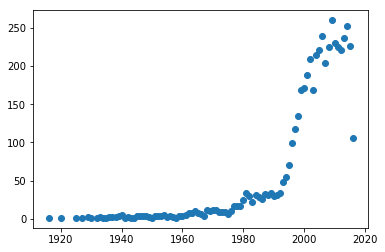

In [24]:
ty=mdf.title_year.value_counts()
plt.scatter(ty.index,ty.values)

In [27]:
mdf[mdf.duplicated()].shape

(45, 28)

In [28]:
mdf.query('title_year < 1940').shape

(21, 28)

In [34]:
mdf[mdf.title_year < 1940].budget.describe()

count    1.900000e+01
mean     1.581823e+06
std      1.599911e+06
min      1.000000e+05
25%      3.824535e+05
50%      1.200000e+06
75%      2.000000e+06
max      6.000000e+06
Name: budget, dtype: float64

In [33]:
mdf.query('title_year > 1980').budget.describe()

count    4.277000e+03
mean     4.187597e+07
std      2.124281e+08
min      2.180000e+02
25%      7.300000e+06
50%      2.000000e+07
75%      4.700000e+07
max      1.221550e+10
Name: budget, dtype: float64

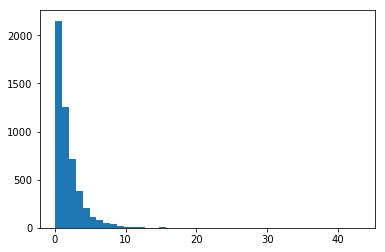

In [14]:
cnts,bns,_=plt.hist(mdf.facenumber_in_poster.dropna(),bins=44)

In [32]:
bns[:17]

array([  0.        ,   0.97727273,   1.95454545,   2.93181818,
         3.90909091,   4.88636364,   5.86363636,   6.84090909,
         7.81818182,   8.79545455,   9.77272727,  10.75      ,
        11.72727273,  12.70454545,  13.68181818,  14.65909091,  15.63636364])

In [24]:
ys=np.log(cnts[:16])

In [26]:
xs=(bns[:17][1:]+bns[:17][:-1])/2.

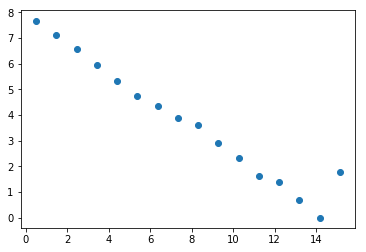

In [28]:
plt.scatter(xs,ys)

In [29]:
cnts

array([  2.15200000e+03,   1.25100000e+03,   7.16000000e+02,
         3.80000000e+02,   2.07000000e+02,   1.14000000e+02,
         7.60000000e+01,   4.80000000e+01,   3.70000000e+01,
         1.80000000e+01,   1.00000000e+01,   5.00000000e+00,
         4.00000000e+00,   2.00000000e+00,   1.00000000e+00,
         6.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   1.00000000e+00])

In [34]:
mdf.facenumber_in_poster.dropna().describe()

count    5030.000000
mean        1.371173
std         2.013576
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        43.000000
Name: facenumber_in_poster, dtype: float64

In [36]:
face=np.array(mdf.facenumber_in_poster.dropna())

In [39]:
Zface=(face-np.mean(face))/np.std(face)

(array([  2.15200000e+03,   1.25100000e+03,   7.16000000e+02,
          3.80000000e+02,   2.07000000e+02,   1.14000000e+02,
          7.60000000e+01,   4.80000000e+01,   3.70000000e+01,
          1.80000000e+01,   1.00000000e+01,   5.00000000e+00,
          4.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          6.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00]),
 array([ -0.68103182,  -0.19564169,   0.28974844,   0.77513858,
          1.26052871, 

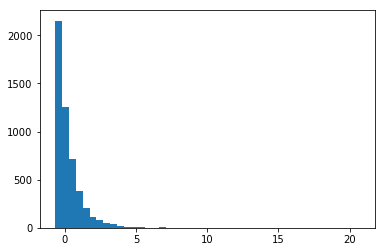

In [41]:
plt.hist(Zface,bins=44)

In [45]:
face.shape

(5030,)

In [46]:
face[Zface<5].shape

(5014,)

In [47]:
from scipy import stats

In [48]:
stats.zscore(face)

array([-0.68103182, -0.68103182, -0.18435355, ..., -0.68103182,
        1.80235956, -0.68103182])

In [49]:
Zface

array([-0.68103182, -0.68103182, -0.18435355, ..., -0.68103182,
        1.80235956, -0.68103182])